## Criar um novo ambiente

Criar um ambiente específico é boa prática quando trabalhamos num projeto.

Diferentes projetos habitualmente precisam de bibliotecas/pacotes diferentes, e alguns pacotes podem ser incompatíveis com outros ou precisar de versões diferentes.

Se estivermos a utilizar uma instalação específica para data science, como o Anaconda ou Miniconda, podemos instalar os nosso pacotes relevantes diretamente na instalação geral, visto que é tão importante isolar as dependências e a instalação é ela própria a ferramenta de trabalho.

Mas se estamos a trabalhar num projeto específico ou com a instalação genérica do python, é recomendável isolar os nossos pacotes.

Para criar um novo ambiente, abrimos o terminal, navegamos para a pasta do projeto e corremos o seguinte comando:

```
python -m venv /path/to/new/virtual/environment
```

Explicação: Estamos a invocar a instalação geral do python, com a flag `-m` para invocar o módulo `venv` e passar o caminho para o nosso novo ambiente.

Existem outras formas de trabalhar:

* Poetry: uma ferramenta para trabalhar com base em projetos
* uv: parecido com o poetry mas também substitui outras ferramentas
* Anaconda ou Miniconda: instalações python específicas orientadas para data science

Nós vamos usar a forma genérica de trabalhar porque é uma boa base para comprender o funcionamento do python e não requer mais instalações.

## Importar packages

Precisamos primeiro de instalar os nossos pacotes.

Os pacotes com que vamos trabalhar são os seguintes:

* Pandas
* Numpy
* Scipy

Para encontrar os comandos para instalar os pacotes, convém verificar o site do autor ou ir ao site [Pypi](https://pypi.org), encontrar o pacote e verificar na *release history* se este é tão antigo quanto esperamos. Existem tentativas frequentes de criar pacotes com nomes parecidos, que contém código malicioso (virus, trojans, etc) e que é ativado quando tentamos usar os pacotes.

Para instalar, vamos abrir o terminal, entrar na pasta do nosso projeto, **ativar o nosso ambiente** e correr os seguintes comandos:

```
pip install pandas
pip install numpy
pip install scipy
```

Além disso, se quisermos abrir ficheiros XLSX precisamos do pacote openpyxl:

```
pip install openpyxl
```

In [8]:
import pandas as pd
import numpy as np

import scipy.stats as stat

## Carregar dataframes

In [338]:
df_utentes = pd.read_csv("data/utentes.csv")
df_altura = pd.read_csv("data/altura.csv")
df_creatinina = pd.read_csv("data/creatinina.csv")
df_peso = pd.read_csv("data/peso.csv")
df_t82 = pd.read_csv("data/t82.csv")
df_t93 = pd.read_csv("data/t93.csv")

all_dataframes = [df_utentes, df_altura, df_creatinina, df_peso, df_t82, df_t93]

In [339]:
for df in all_dataframes:
    display(df.head(2))
    display(df.shape)

,nop,nome,idade,sexo
0,1,Tomás Figueiredo,20,Mulher
1,2,Alícia Soares-Amorim,23,Mulher


(2477, 4)

,nop,nome,data,altura
0,1,Tomás Figueiredo,2024-08-08,157.8
1,2,Alícia Soares-Amorim,2025-05-13,162.7


(2477, 4)

,nop,nome,data do valor,resultado
0,5,Filipe Fonseca-Carneiro,2019-08-29,"1,07 mg/dL"
1,6,Ângela Brito,2016-09-06,"1,01 mg/dL"


(1924, 4)

,nop,nome,data,peso
0,1,Tomás Figueiredo,2024-08-08,58.5
1,2,Alícia Soares-Amorim,2025-05-13,70.6


(2477, 4)

,nop,nome
0,10,Laura Fonseca
1,15,Jorge Pinto


(600, 2)

,nop,nome
0,10,Laura Fonseca
1,12,Kévim Melo


(1077, 2)

## Juntar dataframes

A maior parte destas dataframes partilha informação que não nos interessa muito (nome), e tem o nop como chave identificadora de cada um dos utentes.

Para o caso, a data da avaliação também não nos interessa, e é mais cómodo para nós juntar todas as dataframes numa só, assim podemos usar esses dados como a nossa "tabela-mestre".

Existem diferentes formas de juntar dataframes.

Para este caso vamos definir o nop como índice/index, e utilizar a função [concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) do pandas.

In [340]:
# Preparar as dataframes dos problemas de saúde - Vamos criar uma coluna com o boolean true

df_t82['t82']=True
df_t93['t93']=True

# Preparar a dataframe da creatinina - [renomear a coluna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html#pandas.DataFrame.rename)

df_creatinina.rename(columns={'resultado': 'creatinina'}, inplace=True)

display(df_t82.head(1))
display(df_t93.head(1))
display(df_creatinina.head(1))

,nop,nome,t82
0,10,Laura Fonseca,True


,nop,nome,t93
0,10,Laura Fonseca,True


,nop,nome,data do valor,creatinina
0,5,Filipe Fonseca-Carneiro,2019-08-29,"1,07 mg/dL"


In [341]:
# Definir o index

for df in all_dataframes:
    df.set_index('nop', inplace=True)
    df.drop('nome', axis=1, inplace=True)  # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html#pandas.DataFrame.drop

    df.drop('data', axis=1, errors='ignore', inplace=True)
    df.drop('data do valor', axis=1, errors='ignore', inplace=True)

all_dataframes[0].head(1)

,idade,sexo
nop,,
1,20,Mulher


In [342]:
# Concatenar todas as dataframes

df = pd.concat(all_dataframes,axis=1)

df.head()

,idade,sexo,altura,creatinina,peso,t82,t93
nop,,,,,,,
1,20,Mulher,157.8,NaN,58.5,NaN,NaN
2,23,Mulher,162.7,NaN,70.6,NaN,NaN
3,50,Homem,NaN,NaN,99.6,NaN,NaN
5,43,Homem,165.2,"1,07 mg/dL",75.3,NaN,NaN
6,50,Homem,180.5,"1,01 mg/dL",78.0,NaN,NaN


## Observar dados, identificar problemas

Agora, precisamos de perceber que dados carregámos, qual é o aspeto deles, se há algo de errado com eles.

Isto é bom de fazer no início mas é frequente termos de voltar atrás no nosso processo quando descobrimos outras aberrações nos dados.

In [343]:
df.dtypes

idade           int64
sexo           object
altura        float64
creatinina     object
peso          float64
t82            object
t93            object
dtype: object

A creatinina devia ser float64, tem de ser recodificada.

In [344]:
df.sexo.value_counts()

sexo
Mulher    1515
Homem      962
Name: count, dtype: int64

In [345]:
df.describe()

,idade,altura,peso
count,2477.000000,2386.000000,2059.000000
mean,52.461445,164.503269,71.843953
std,21.381540,44.499708,18.970377
min,0.000000,45.100000,3.000000
25%,36.000000,156.600000,60.900000
50%,52.000000,163.800000,71.000000
75%,70.000000,171.475000,82.800000
max,104.000000,1620.000000,156.400000


algo anormal se passa com a altura, 16 metros é claramente demasiado.

In [346]:
df[df.altura > 300]

,idade,sexo,altura,creatinina,peso,t82,t93
nop,,,,,,,
2863,79,Mulher,1620.0,"0,7 mg/dL",58.3,NaN,True
3016,83,Homem,1613.0,"1,01 mg/dL",NaN,NaN,True


Para já, não podemos fazer nada quanto à creatinina, temos de transformar em números para analisar.

## Recodificar variáveis

Recodificar variáveis pode ser diferentes coisas. Desde alterar variáveis categóricas para outra nomenclatura, alterar os tipos de dados, converter datas de string para datetime...

Neste caso, precisamos de

* alterar a creatinina para numérica
* vamos alterar a categorização do sexo para facilitar a nossa vida também

In [347]:
# Como está a creatinina?

df.creatinina

nop
1              NaN
2              NaN
3              NaN
5       1,07 mg/dL
6       1,01 mg/dL
           ...    
3041    1,11 mg/dL
3042    1,43 mg/dL
3043    0,65 mg/dL
3044    1,37 mg/dL
3045    0,71 mg/dL
Name: creatinina, Length: 2477, dtype: object

pelo aspeto geral, parece ser suficiente partir pelo espaço entre o valor e a unidade. Vamos inspecionar as unidades para ver se é correto

In [348]:
df.creatinina.str.split(' ').str[1].unique()

array([nan, 'mg/dL', 'mg'], dtype=object)

parece ok, vamos assumir que o 'mg' é mg/dL

In [349]:
df.creatinina.str.split(' ').str[0].astype('float64')

ValueError: could not convert string to float: '1,07'

As vírgulas têm de passar a pontos primeiro

In [350]:
df.creatinina.str.split(' ').str[0].str.replace(',', '.').astype('float64')

nop
1        NaN
2        NaN
3        NaN
5       1.07
6       1.01
        ... 
3041    1.11
3042    1.43
3043    0.65
3044    1.37
3045    0.71
Name: creatinina, Length: 2477, dtype: float64

In [351]:
# tudo ok, vamos trocar os dados

df.creatinina = df.creatinina.str.split(' ').str[0].str.replace(',', '.').astype('float64')

In [352]:
df.creatinina.describe()

count    1924.000000
mean        1.111014
std         6.337850
min         0.100000
25%         0.670000
50%         0.790000
75%         0.960000
max       213.350000
Name: creatinina, dtype: float64

213 de creatinina parece estranho...

In [353]:
df[df.creatinina>10]

,idade,sexo,altura,creatinina,peso,t82,t93
nop,,,,,,,
679,52,Mulher,164.9,10.75,NaN,NaN,NaN
1143,68,Mulher,154.7,45.51,83.4,True,True
1175,59,Mulher,165.0,213.35,50.9,NaN,NaN
1887,81,Homem,168.6,54.15,85.2,NaN,True
2074,60,Mulher,166.5,164.91,60.2,NaN,True
2453,62,Mulher,165.3,10.43,56.2,NaN,NaN


In [354]:
df.sexo.unique()

array(['Mulher', 'Homem'], dtype=object)

In [355]:
df = df.assign(sexo=df.sexo.map({'Mulher':'f', 'Homem':'m'}))

df.sexo.unique()

array(['f', 'm'], dtype=object)

## Remover dados inválidos

Vamos remover os dados inválidos.

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'altura'}>],
       [<Axes: title={'center': 'creatinina'}>,
        <Axes: title={'center': 'peso'}>]], dtype=object)

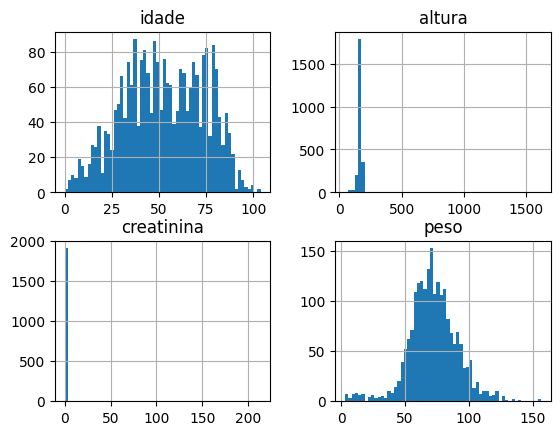

In [356]:
df.hist(bins=60)

In [357]:
df.loc[df.creatinina > 50, 'creatinina'] = np.nan

In [358]:
df.loc[df.altura > 250, 'altura'] = df.loc[df.altura > 250, 'altura'].apply(lambda x: x/10)

## Calcular GFR (Cockcroft-Gault)

mL/min = (140 – age) × (weight, kg) × (0.85 if female) / (72 × Cr, mg/dL)

In [359]:
def calc_gfr(row):
    age = row['idade']
    weight = row['peso']
    sex_ratio = 1

    if row['sexo'] == 'f':
        sex_ratio = 0.85

    creat = row['creatinina']

    gfr = (140 - age) * weight * sex_ratio / (72 * creat)

    return gfr


In [360]:
df['cl_creat'] = df[['idade', 'peso', 'sexo', 'creatinina']].dropna().apply(calc_gfr, axis=1)

In [361]:
df.cl_creat.describe()

count    1586.000000
mean       99.667108
std        50.733314
min         1.557680
25%        68.323623
50%        94.886617
75%       121.627999
max      1173.413194
Name: cl_creat, dtype: float64

## Estatística descritivas: média, mediana, quartis, percentis, frequência

In [362]:
df.describe()

,idade,altura,creatinina,peso,cl_creat
count,2477.000000,2386.000000,1921.000000,2059.000000,1586.000000
mean,52.461445,163.283780,0.887652,71.843953,99.667108
std,21.381540,14.517957,1.131750,18.970377,50.733314
min,0.000000,45.100000,0.100000,3.000000,1.557680
25%,36.000000,156.600000,0.670000,60.900000,68.323623
50%,52.000000,163.800000,0.790000,71.000000,94.886617
75%,70.000000,171.400000,0.960000,82.800000,121.627999
max,104.000000,202.600000,45.510000,156.400000,1173.413194


In [363]:
df.cl_creat.quantile(0.90)

np.float64(154.48389969195222)

In [364]:
df.sexo.value_counts()

sexo
f    1515
m     962
Name: count, dtype: int64

In [365]:
df.groupby('sexo').count()

,idade,altura,creatinina,peso,t82,t93,cl_creat
sexo,,,,,,,
f,1515,1471,1214,1233,413,636,978
m,962,915,707,826,187,441,608


### Pirâmide etária, como extrair os valores.

Precisamos de dividir as idades das pessoas em grupos [0, 5[

Para isso, vamos usar o [cut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html)

Depois, agrupamos os dados.

In [366]:
bins = range(0, int(df.idade.max()) + 5, 5)

bins

range(0, 109, 5)

In [367]:
df["grupo_idade"] = pd.cut(df.idade, bins=bins, right=False)

In [368]:
df.groupby(['sexo', 'grupo_idade']).size()

/var/folders/1b/s3lphvq1105d79tkvgv17pgh0000gn/T/ipykernel_43101/3003362817.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sexo', 'grupo_idade']).size()


sexo  grupo_idade
f     [0, 5)           8
      [5, 10)         15
      [10, 15)        26
      [15, 20)        45
      [20, 25)        51
      [25, 30)        81
      [30, 35)       127
      [35, 40)       132
      [40, 45)       109
      [45, 50)       111
      [50, 55)       116
      [55, 60)        85
      [60, 65)        99
      [65, 70)       118
      [70, 75)       109
      [75, 80)       112
      [80, 85)        93
      [85, 90)        58
      [90, 95)        11
      [95, 100)        6
      [100, 105)       3
m     [0, 5)           5
      [5, 10)         25
      [10, 15)        16
      [15, 20)        37
      [20, 25)        28
      [25, 30)        40
      [30, 35)        55
      [35, 40)        54
      [40, 45)        75
      [45, 50)        96
      [50, 55)        79
      [55, 60)        60
      [60, 65)        68
      [65, 70)        62
      [70, 75)        73
      [75, 80)        86
      [80, 85)        47
      [85, 90)        34
      [

In [369]:
# Uma forma melhor de apresentar

pd.crosstab(df.grupo_idade, df.sexo)

sexo,f,m
grupo_idade,,
"[0, 5)",8,5
"[5, 10)",15,25
"[10, 15)",26,16
"[15, 20)",45,37
"[20, 25)",51,28
"[25, 30)",81,40
"[30, 35)",127,55
"[35, 40)",132,54
"[40, 45)",109,75


## Estatística inferencial: Correlação

Obter a correlação entre duas variáveis é bastante simples e o pandas expõe um método especificamente para isso.

In [370]:
df[['idade', 'peso', 'altura', 'creatinina', 'cl_creat']].corr()

,idade,peso,altura,creatinina,cl_creat
idade,1.000000,0.242818,0.099559,0.088107,-0.587159
peso,0.242818,1.000000,0.587200,0.033685,0.401857
altura,0.099559,0.587200,1.000000,0.019813,0.215470
creatinina,0.088107,0.033685,0.019813,1.000000,-0.191422
cl_creat,-0.587159,0.401857,0.215470,-0.191422,1.000000


## Estatística inferencial: T-Student

Para calcular o T-Test, precisamos de utilizar o SciPy: [T-Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#ttest-ind)

In [383]:
print(df[df.t93==True].peso.dropna().mean())
print(df[df.t93!=True].peso.dropna().mean())

75.0125
69.40283748925195


In [384]:
stat.ttest_ind(
    df[df.t93==True].peso.dropna(),
    df[df.t93!=True].peso.dropna()
)

TtestResult(statistic=np.float64(6.723435932354184), pvalue=np.float64(2.2916586992179448e-11), df=np.float64(2057.0))

Nota: 11 zeros, ou seja p=0.00000000002

In [386]:
print(df[df.t93==True].creatinina.dropna().mean())
print(df[df.t93!=True].creatinina.dropna().mean())

0.934380487804878
0.8341964285714286


In [387]:
stat.ttest_ind(
    df[df.t93==True].creatinina.dropna(),
    df[df.t93!=True].creatinina.dropna()
)

TtestResult(statistic=np.float64(1.9369186174390725), pvalue=np.float64(0.052901906303812474), df=np.float64(1919.0))